# Semi-Supervised Learning with NLP<hr>
<p style= "font-size: 20px">In this notebook we will perform semi-supervised learning using <b>MNIST</b> dataset and LogisticRegression as the Classifier. 
To start of, let's suppose we have a bunch of images to classify but we dont have labels 😢. <b>What should we do??</b>, well as a good friend say:</p> 

<i style= "font-size: 20px">"" If intelligence was a cake, <span style= "color: orange">Unsupervised Learning</span> would be the cake, <span style= "color: green">Supervised Learning</span> would be the icing on the cake, and <span style= "color: red">Reinforcement Learning</span> would be the cherry on the cake. "" [ Yann LeCun ]</i>

<p style= "font-size: 20px">In other words, there is a huge potential in <span style= "color: purple">Unsupervised Learning</span>.</p> 

<p style= "font-size: 20px">
<span style= "color: cyan">Objective.</span><br>
  Try to reach a good precision.
 </p>

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


## Import Mnist Images
<hr>

In [2]:
# Import Training set
TRAINING_SET = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
# Import TESTING set
TESTING_SET = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

# Explore Dataset
data = TRAINING_SET.sample(5000)
data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
26620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55585,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14695,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45967,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15347,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 26620 to 3815
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 30.0 MB


In [4]:
# Split Images and Labels
images = data.drop('label', axis= 1).values
labels = data['label'].values

## Visualize Images
<hr>

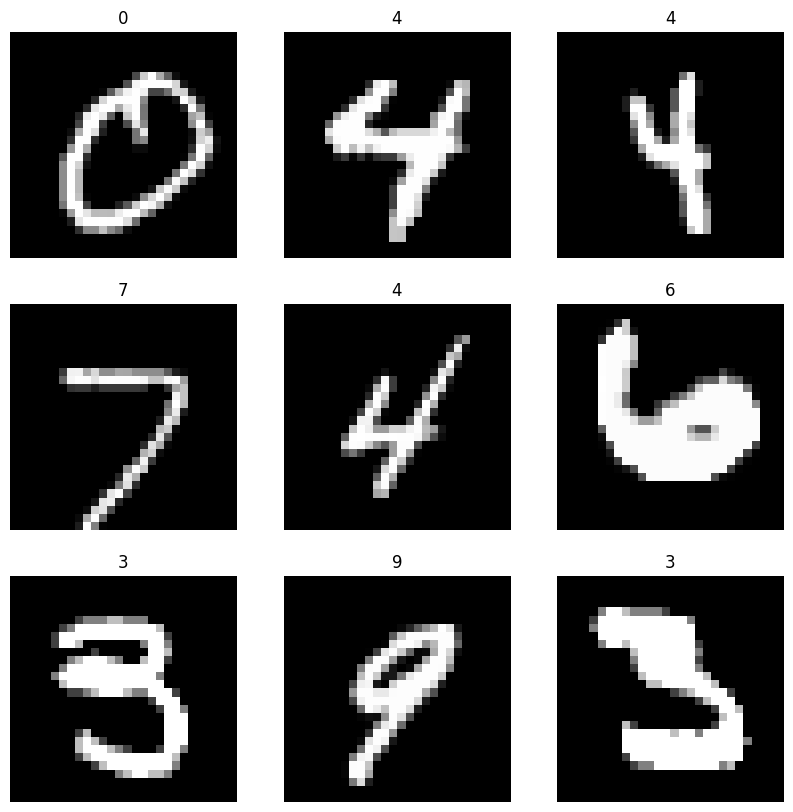

In [5]:
labels_name = ['0','1','2','3','4',
              '5','6','7','8','9',]

def print_img(images, labels= [], img_dim= 28, rows= 3, columns= 3):
    n_img = rows * columns
    plt.figure(figsize= (10,10))
    
    for i in range(n_img):
        plt.subplot(rows, columns, i+1)
        plt.imshow(images[i].reshape(img_dim,img_dim,1), cmap= 'gray')
        if len(labels):
            plt.title(labels_name[labels[i]])
        plt.axis(False)
    plt.show()
    
print_img(images= images, labels= labels)

## Representative Images
<hr>
We will cluster all the images and then select the representative images for each cluster (the closest sample of each cluster) then manually label them.

**Note.** We will use MiniBatchKMeans due to the large number of samples.

In [6]:
# Scale the Pixels of the Images
x_train = images.astype(np.float32) / 255.0

print(f"""
    Max Pixel: {np.max(x_train)}
    Min Pixel: {np.min(x_train)}
""")


    Max Pixel: 1.0
    Min Pixel: 0.0



In [7]:
# Train MiniBatchKMeans and get the Distances from each cluster center
k = 50
kmeans = MiniBatchKMeans(n_clusters= k, n_init= 'auto')
imgs_dist = kmeans.fit_transform(x_train)

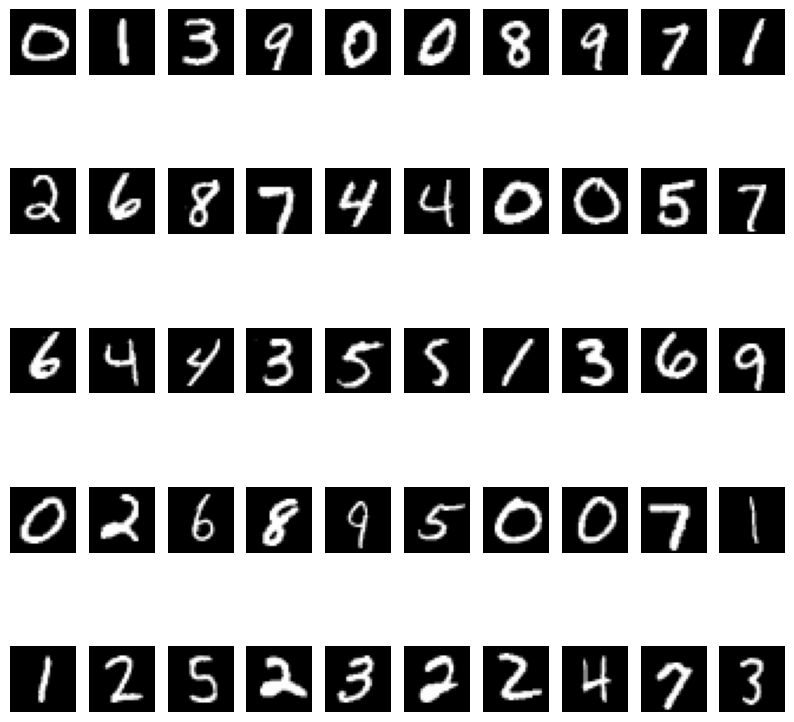

In [8]:
# Get the index of the representative image of each cluster
representative_imgs_idx = np.argmin(imgs_dist, axis= 0)
# Get the representative image
X_representative_imgs = x_train[representative_imgs_idx]
# Display representative images
print_img(images= X_representative_imgs, rows= 5, columns= 10)

Now let's label all the representative images manually. 

**Note.** Since in Kaggle, when we save our notebook, it runs the entire notebook again, causing the clusters to change, we will get the labels directly from the labels array.

In [9]:
y_representative_imgs = labels[representative_imgs_idx]
y_representative_imgs

array([0, 1, 3, 9, 0, 0, 8, 9, 7, 1, 2, 6, 8, 7, 4, 4, 0, 0, 5, 7, 6, 4,
       4, 3, 5, 5, 1, 3, 6, 9, 0, 2, 6, 8, 9, 5, 0, 0, 7, 1, 1, 2, 5, 2,
       3, 2, 2, 4, 7, 3])

In [10]:
# Train the Logistic Regression Model
log_reg_1 = LogisticRegression(max_iter= 1000)
log_reg_1.fit(X_representative_imgs, y_representative_imgs)

LogisticRegression(max_iter=1000)

In [11]:
# Split the Images and Labels
X_testing = TESTING_SET.drop('label', axis= 1).values
y_testing = TESTING_SET['label'].values

# Scale the pixels of the Images
X_testing_scaled = X_testing.astype(np.float32) / 255.0

In [12]:
# Get the Score
log_reg_1.score(X_testing_scaled, y_testing)

0.7632

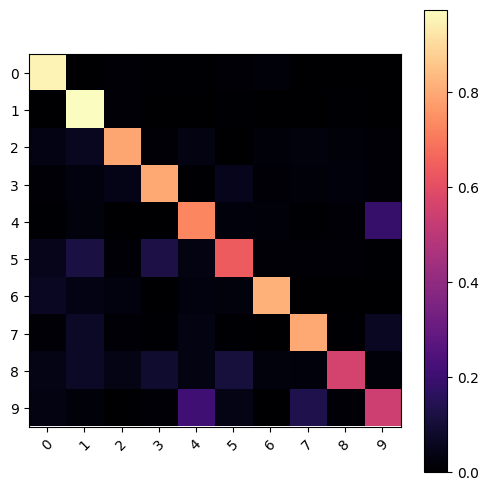

In [13]:
# Confusion Matrix
predictions = log_reg_1.predict(X_testing_scaled)
matrix = confusion_matrix(y_testing, predictions)
accuracy = matrix / np.sum(matrix, axis= 1, keepdims= True)

fig, ax = plt.subplots(figsize= (6,6))
cm = ax.imshow(accuracy, cmap= 'magma')
cbar = ax.figure.colorbar(cm, ax= ax)

ax.set_xticks(np.arange(len(labels_name)), labels_name, rotation= 45)
ax.set_yticks(np.arange(len(labels_name)), labels_name)
plt.show()

As we can see, 50 samples are not enough to achieve good accuracy,the model tends to misclassify 4s with 9s. So we will have to go further, the next step is **Label Propagation**.

## Label Propagation
<hr>

Since we have the labels for the representative images of each cluster, we can propagate these labels to the entire cluster; Doing so will give us more samples to train on and hopefully outperforme the last result.

In [14]:
# Labels Propagation
y_train_propagated = np.zeros(shape= [len(x_train)], dtype= np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_imgs[i]

In [15]:
# Train once more the model
log_reg_2 = LogisticRegression(solver= 'saga', max_iter= 10000)
log_reg_2.fit(x_train, y_train_propagated)

LogisticRegression(max_iter=10000, solver='saga')

In [16]:
log_reg_2.score(X_testing, y_testing)

0.6769

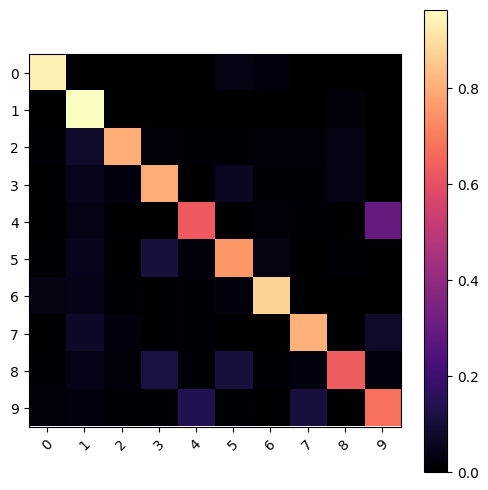

In [17]:
# Confusion Matrix
predictions = log_reg_2.predict(X_testing_scaled)
matrix = confusion_matrix(y_testing, predictions)
accuracy = matrix / np.sum(matrix, axis= 1, keepdims= True)

fig, ax = plt.subplots(figsize= (6,6))
cm = ax.imshow(accuracy, cmap= 'magma')
cbar = ax.figure.colorbar(cm, ax= ax)

ax.set_xticks(np.arange(len(labels_name)), labels_name, rotation= 45)
ax.set_yticks(np.arange(len(labels_name)), labels_name)
plt.show()

That's not what we were expecting, the precision is worse than before. But why does that happen?, well let's compare the labels propagated with the real labels.

In [18]:
labels_acc = np.mean(y_train_propagated == labels)
print(f"""
    Labels Accuracy: {labels_acc}
""")


    Labels Accuracy: 0.8004



We just labeled about 75% of the samples correctly, now everything makes sense. 😮

## Label Partially Propagated
<hr>

There is a problem with **Label Propagation** and the problem is that if we propagate the labels it is more likely to misclassify data, those samples that are close to the boundaries of the cluster. Based on that, we will just propagate the labels just for the 20% of the closest samples.

In [19]:
percentile = 20
n = imgs_dist.shape[0]

cluster_dist = imgs_dist[np.arange(n), kmeans.labels_]
for i in range(k):
    in_cluster = kmeans.labels_ == i
    in_cluster_dist = imgs_dist[in_cluster, i]
    cutoff = np.percentile(in_cluster_dist, percentile)
    above_cutoff = (cluster_dist > cutoff) & (in_cluster)
    cluster_dist[above_cutoff] = -1
idx_partially_propagated = np.where(cluster_dist != -1)[0]
X_partially_propagated = x_train[idx_partially_propagated]
y_partially_propagated = y_train_propagated[idx_partially_propagated]

In [20]:
# Train the model
log_reg_3 = LogisticRegression(max_iter= 1000)
log_reg_3.fit(X_partially_propagated, y_partially_propagated)

LogisticRegression(max_iter=1000)

In [21]:
log_reg_3.score(X_testing_scaled, y_testing)

0.7983

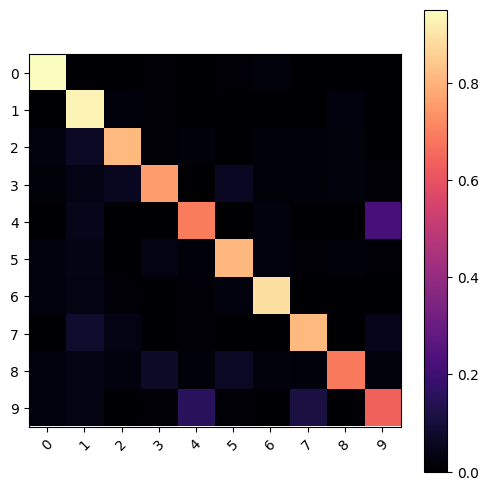

In [22]:
# Confusion Matrix
predictions = log_reg_3.predict(X_testing_scaled)
matrix = confusion_matrix(y_testing, predictions)
accuracy = matrix / np.sum(matrix, axis= 1, keepdims= True)

fig, ax = plt.subplots(figsize= (6,6))
cm = ax.imshow(accuracy, cmap= 'magma')
cbar = ax.figure.colorbar(cm, ax= ax)

ax.set_xticks(np.arange(len(labels_name)), labels_name, rotation= 45)
ax.set_yticks(np.arange(len(labels_name)), labels_name)
plt.show()

In [23]:
labels_acc = np.mean(y_partially_propagated == labels[idx_partially_propagated])
print(f"""
    Labels Accuracy: {labels_acc}
""")


    Labels Accuracy: 0.931237721021611



As we saw, unsupervised learning has great potential, although we couldn't reach our objective, at least we learn something, or at least I hopse so. There are even many things we could do to improve accuracy, such as applying PCA to perform dimensionality reduction or using a much more powerful classifier.